In [197]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import re
import numpy as np

In [198]:
# file - the project data in json format
# file - explaining how to work with the dataframe and the questions that needs to be answered.

file = 'Desktop/Data Science - Springboard/data_wrangling_json/data/world_bank_projects.json'
file1 = 'Desktop/Data Science - Springboard/data_wrangling_json/sliderule_dsi_json_exercise.ipynb'

In [199]:
# Reading the project dataframe. Saved in a new variable, called json_data

with open(file, 'r') as json_file:
    json_data = json.load(json_file)

In [200]:
# Reading file1

with open(file1, 'r') as json_file:
    json_data_1 = json.load(json_file)

In [201]:
# Here, I printed the file1, which was stored in json_data_1, and then I copy and past on json formatter for
# better understanding of the file.

print(json_data_1)

{'cells': [{'cell_type': 'markdown', 'metadata': {}, 'source': ['# JSON examples and exercise\n', '****\n', '+ get familiar with packages for dealing with JSON\n', '+ study examples with JSON strings and files \n', '+ work on exercise to be completed and submitted \n', '****\n', '+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader\n', '+ data source: http://jsonstudio.com/resources/\n', '****']}, {'cell_type': 'code', 'execution_count': 3, 'metadata': {'collapsed': True}, 'outputs': [], 'source': ['import pandas as pd']}, {'cell_type': 'markdown', 'metadata': {}, 'source': ['## imports for Python, Pandas']}, {'cell_type': 'code', 'execution_count': 6, 'metadata': {'collapsed': True}, 'outputs': [], 'source': ['import json\n', 'from pandas.io.json import json_normalize']}, {'cell_type': 'markdown', 'metadata': {}, 'source': ['## JSON example, with string\n', '\n', '+ demonstrates creation of normalized dataframes (tables) from nested json string\n', '+ source

In [202]:
# In order to make the file more readable, I looped over json file made the keys and values more explicit.

for key, value in json_data[0].items():
    print('{} : {}'.format(key, value))

sector : [{'Name': 'Primary education'}, {'Name': 'Secondary education'}, {'Name': 'Public administration- Other social services'}, {'Name': 'Tertiary education'}]
supplementprojectflg : N
projectfinancialtype : IDA
prodline : PE
mjtheme : ['Human development']
idacommamt : 130000000
impagency : MINISTRY OF EDUCATION
project_name : Ethiopia General Education Quality Improvement Project II
mjthemecode : 8,11
closingdate : 2018-07-07T00:00:00Z
totalcommamt : 130000000
id : P129828
mjsector_namecode : [{'code': 'EX', 'name': 'Education'}, {'code': 'EX', 'name': 'Education'}, {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}, {'code': 'EX', 'name': 'Education'}]
docty : Project Information Document,Indigenous Peoples Plan,Project Information Document
sector1 : {'Percent': 46, 'Name': 'Primary education'}
lendinginstr : Investment Project Financing
countrycode : ET
sector2 : {'Percent': 26, 'Name': 'Secondary education'}
totalamt : 130000000
mjtheme_namecode : [{'code': '8',

In [203]:
len(json_data)

500

In [204]:
# Transforming the json file into a dataframe

wb = pd.read_json(file)
wb.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [205]:
# FIRST QUESTION - '1. Find the 10 countries with most projects'

# Analyzing how many times each country was mentioned in the dataframe. Thus, getting the total amount 
# of project for each of them.

wb_countries_projects = wb['countryname'].value_counts()

In [206]:
wb_project_top = wb_countries_projects.head(10)
print(wb_project_top)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64


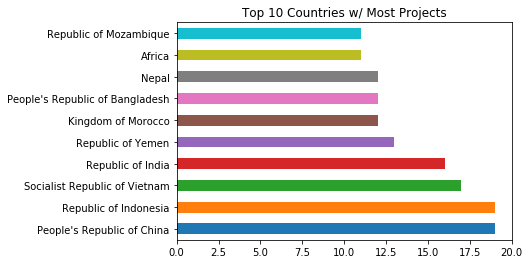

In [207]:
wb_project_top.plot(kind='barh', xlim=([0,20]), title='Top 10 Countries w/ Most Projects')

In [208]:
# SECOND QUESTION - '2. Find the top 10 major project themes (using column 'mjtheme_namecode')'
# THIRD QUESTION - '3. In 2. above you will notice that some entries have only the code 
# and the name is missing. Create a dataframe with the missing names filled in.'


# Since, question two will be delivered fully after answering question three. 
# I will first answer three and then two


# Here, I created a new dataframe with json_normalize, called major_project. 
# json_normalize allows to expand a dataframe from values in an 
# observation (if this observation contains a dictionary inside).
# The new dataframe shows the Major Project Themes.

major_project = json_normalize(json_data, 'mjtheme_namecode', ['countryname', 'countrycode'])
top_major_project = major_project['countryname'].value_counts().head(10)

major_project.head()

,code,name,countryname,countrycode
0,8,Human development,Federal Democratic Republic of Ethiopia,ET
1,11,,Federal Democratic Republic of Ethiopia,ET
2,1,Economic management,Republic of Tunisia,TN
3,6,Social protection and risk management,Republic of Tunisia,TN
4,5,Trade and integration,Tuvalu,TV


In [209]:
# EXTRA EXERCISE

# Countries with most projects (not approved yet)

print(top_major_project)

Republic of Indonesia              56
Republic of India                  51
Socialist Republic of Vietnam      43
Federative Republic of Brazil      41
People's Republic of Bangladesh    41
People's Republic of China         40
Africa                             39
Republic of Yemen                  34
Kingdom of Morocco                 32
Republic of Mozambique             31
Name: countryname, dtype: int64


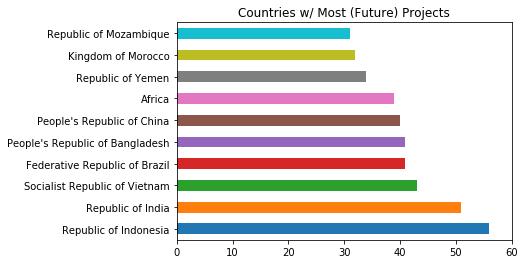

In [210]:
top_major_project.plot(kind='barh', xlim=([0,60]), title='Countries w/ Most (Future) Projects')

In [211]:
# Analyzing the components of the new dataframe, major_project

major_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code           1499 non-null object
name           1499 non-null object
countryname    1499 non-null object
countrycode    1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB


In [212]:
# As we can see above, the 'code' column is not treated as an integer but as an object. For us to be able to sort
# and identify the amount of themes, we will need to convert to integer.

major_project['code'] = major_project['code'].astype(int)
major_project = major_project.sort_values('code')
major_project.head()

,code,name,countryname,countrycode
1114,1,,Republic of Honduras,HN
647,1,Economic management,Lao People's Democratic Republic,LA
1260,1,Economic management,Hashemite Kingdom of Jordan,JO
648,1,Economic management,Lao People's Democratic Republic,LA
1437,1,,Republic of Guatemala,GT


In [213]:
# The Theme names have a lot of missing values, and in order to fill these gaps I will first transform the empty
# strings into NaN and then use back fill, which will fill the NaN values according with the previous value.

major_project['name'] = major_project['name'].replace('', np.nan)
major_project['name'] = major_project['name'].fillna(method='bfill')

In [214]:
# Since each code is equal to only one name, I created a pivot_table to identify if the back fill method created
# 2 or more names for a single code. In the table below, we can see that code 7 has 2 names. Therefore, 
# one row needs to be fixed.


pd.pivot_table(major_project, values='countrycode', index=['code','name'], columns='countryname', aggfunc='count')

countryname                                        Africa  \
code name                                                   
1    Economic management                              NaN   
2    Public sector governance                         2.0   
3    Rule of law                                      NaN   
4    Financial and private sector development         5.0   
5    Trade and integration                           10.0   
6    Social protection and risk management            NaN   
7    Human development                                NaN   
     Social dev/gender/inclusion                      2.0   
8    Human development                                2.0   
9    Urban development                                2.0   
10   Rural development                                6.0   
11   Environment and natural resources management    10.0   

countryname                                        Antigua and Barbuda  \
code name                                                                
1    Economic management                                           NaN   
2    Public sector governance                                      1.0   
3    Rule of law                                                   NaN   
4    Financial and private sector development                      NaN   
5    Trade and integration                                         NaN   
6    Social protection and risk management                         3.0   
7    Human development                                             NaN   
     Social dev/gender/inclusion                                   NaN   
8    Human development                                             NaN   
9    Urban development                                             NaN   
10   Rural development                                             NaN   
11   Environment and natural resources management                  NaN   

countryname                                        Arab Republic of Egypt  \
code name                                                                   
1    Economic management                                              NaN   
2    Public sector governance                                         NaN   
3    Rule of law                                                      NaN   
4    Financial and private sector development                         1.0   
5    Trade and integration                                            NaN   
6    Social protection and risk management                            NaN   
7    Human development                                                NaN   
     Social dev/gender/inclusion                                      1.0   
8    Human development                                                1.0   
9    Urban development                                                NaN   
10   Rural development                                                1.0   
11   Environment and natural resources management                     NaN   

countryname                                        Argentine Republic  \
code name                                                               
1    Economic management                                          NaN   
2    Public sector governance                                     NaN   
3    Rule of law                                                  NaN   
4    Financial and private sector development                     1.0   
5    Trade and integration                                        NaN   
6    Social protection and risk management                        1.0   
7    Human development                                            NaN   
     Social dev/gender/inclusion                                  NaN   
8    Human development                                            NaN   
9    Urban development                                            NaN   
10   Rural development                                            NaN   
11   Environment and natural resources management                 5.0   

countr

In [215]:
# Change the incorrect value at the code 7 (human development) to Social dev/gender/inclusion

major_project.loc[(major_project['name'] == 'Human development') & (major_project['code'] == 7), 'name'] = 'Social dev/gender/inclusion'

In [216]:
# Question three (Answered) - major_project has no more missing values on Theme Names.

major_project.head()

,code,name,countryname,countrycode
1114,1,Economic management,Republic of Honduras,HN
647,1,Economic management,Lao People's Democratic Republic,LA
1260,1,Economic management,Hashemite Kingdom of Jordan,JO
648,1,Economic management,Lao People's Democratic Republic,LA
1437,1,Economic management,Republic of Guatemala,GT


In [217]:
# Question two (Answered) - Top 10 major themes

top_major_themes = major_project['name'].value_counts().head(10)
top_major_themes

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

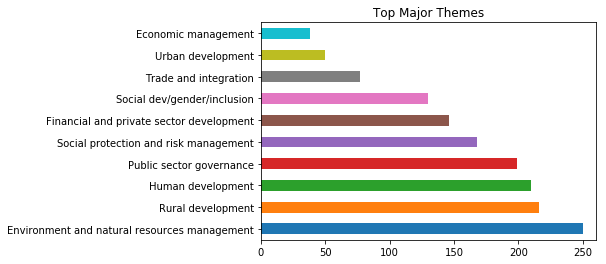

In [219]:
top_major_themes.plot(kind='barh', xlim=([0,260]), title='Top Major Themes')